# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

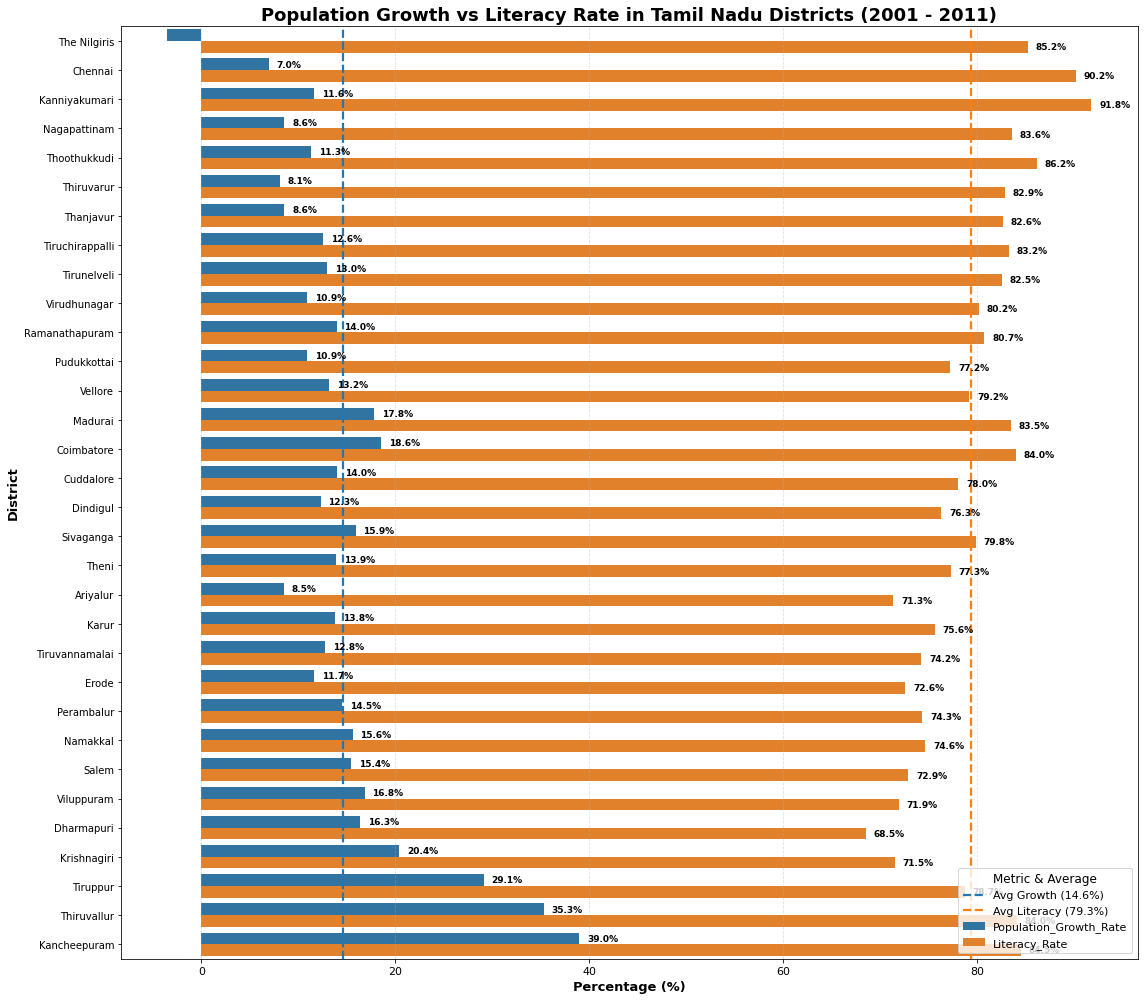

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean the dataset
df = pd.read_csv("tamil_nadu_district_data_final_32.csv")
df["Population_Growth_Rate"] = df["Population_Growth_Rate"].str.replace('%', '').astype(float)
df["Literacy_Rate"] = df["Literacy_Rate"].str.replace('%', '').astype(float)

# Sort by Literacy - Growth gap
df["Gap"] = df["Literacy_Rate"] - df["Population_Growth_Rate"]
df_sorted = df.sort_values("Gap", ascending=False)

# Melt for plotting
df_melted = df_sorted.melt(id_vars="District",
                           value_vars=["Population_Growth_Rate", "Literacy_Rate"],
                           var_name="Metric",
                           value_name="Percentage")

# Set figure
plt.figure(figsize=(16, 14))

# Custom color palette
custom_palette = {
    "Population_Growth_Rate": "#1f77b4",  # steel blue
    "Literacy_Rate": "#ff7f0e"            # orange
}

# Plot bars
barplot = sns.barplot(data=df_melted,
                      x="Percentage", y="District",
                      hue="Metric", palette=custom_palette)

# Add value labels
for bar in barplot.patches:
    value = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    if value > 0:
        barplot.text(value + 0.8, y, f'{value:.1f}%', color='black',
                     ha='left', va='center', fontsize=9, fontweight='bold')

# Add average lines
avg_growth = df["Population_Growth_Rate"].mean()
avg_literacy = df["Literacy_Rate"].mean()

plt.axvline(avg_growth, color=custom_palette["Population_Growth_Rate"],
            linestyle='--', linewidth=2.2, label=f'Avg Growth ({avg_growth:.1f}%)')

plt.axvline(avg_literacy, color=custom_palette["Literacy_Rate"],
            linestyle='--', linewidth=2.2, label=f'Avg Literacy ({avg_literacy:.1f}%)')

# Titles and labels
plt.title("Population Growth vs Literacy Rate in Tamil Nadu Districts (2001 - 2011)",
          fontsize=18, weight='bold')
plt.xlabel("Percentage (%)", fontsize=13, weight='bold')
plt.ylabel("District", fontsize=13, weight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Updated legend
plt.legend(title="Metric & Average", fontsize=11, title_fontsize=12, loc="lower right")

# Save and show
plt.tight_layout()
plt.savefig("tamilnadu_growth_vs_literacy_final_styled.png", dpi=400, bbox_inches='tight')
plt.show()